In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import pickle

In [18]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df_orig = df.copy()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [19]:
print("Unique Values of Fuel:", df['fuel'].unique())
print("Unique Values of Seller Type:", df['seller_type'].unique())
print("Unique Values of transmission:", df['transmission'].unique())
print("Unique Values of owner:", df['owner'].unique())

Unique Values of Fuel: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Unique Values of Seller Type: ['Individual' 'Dealer' 'Trustmark Dealer']
Unique Values of transmission: ['Manual' 'Automatic']
Unique Values of owner: ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [20]:
df.replace({'owner':{'First Owner' : 'First_Owner',
                    'Second Owner' : 'Second_Owner',
                    'Third Owner' : 'Third_Owner',
                    'Fourth & Above Owner' : 'Fourth_and_Above_Owner',
                    'Test Drive Car' : 'Test_Drive_Car'},
           'seller_type':{'Trustmark Dealer' : 'Trustmark_Dealer'}}, inplace=True)

In [21]:
print("Unique Values of Seller Type:", df['seller_type'].unique())
print("Unique Values of owner:", df['owner'].unique())

Unique Values of Seller Type: ['Individual' 'Dealer' 'Trustmark_Dealer']
Unique Values of owner: ['First_Owner' 'Second_Owner' 'Fourth_and_Above_Owner' 'Third_Owner'
 'Test_Drive_Car']


In [22]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [23]:
df.drop('name', axis=1, inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First_Owner
1,2007,135000,50000,Petrol,Individual,Manual,First_Owner
2,2012,600000,100000,Diesel,Individual,Manual,First_Owner
3,2017,250000,46000,Petrol,Individual,Manual,First_Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second_Owner


In [24]:
df['age_of_car'] = 2021 - df['year']

In [25]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age_of_car
0,2007,60000,70000,Petrol,Individual,Manual,First_Owner,14
1,2007,135000,50000,Petrol,Individual,Manual,First_Owner,14
2,2012,600000,100000,Diesel,Individual,Manual,First_Owner,9
3,2017,250000,46000,Petrol,Individual,Manual,First_Owner,4
4,2014,450000,141000,Diesel,Individual,Manual,Second_Owner,7


In [26]:
df.drop('year', axis=1, inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age_of_car
0,60000,70000,Petrol,Individual,Manual,First_Owner,14
1,135000,50000,Petrol,Individual,Manual,First_Owner,14
2,600000,100000,Diesel,Individual,Manual,First_Owner,9
3,250000,46000,Petrol,Individual,Manual,First_Owner,4
4,450000,141000,Diesel,Individual,Manual,Second_Owner,7


In [27]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,selling_price,km_driven,age_of_car,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth_and_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [28]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [13]:
knn.score(X_test, y_test)

0.6229911605478164

In [14]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.04032258064516129

In [15]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.3379360804772822

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5025071208924413

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
regressor = RandomForestRegressor()

In [33]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [34]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [35]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)

In [36]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [37]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [38]:
rf_random.best_score_

-125420218493.76897

In [39]:
predictions=rf_random.predict(X_test)

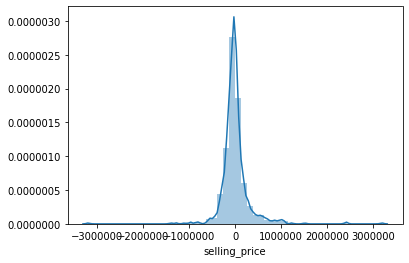

In [40]:
sns.distplot(y_test-predictions)

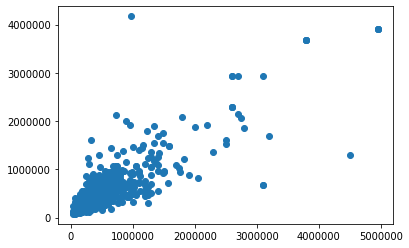

In [41]:
plt.scatter(y_test,predictions)

In [42]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [4]:
model = pickle.load(open(r'C:\Users\HP\PycharmProjects\CarPrediction\random_forest_regression_model.pkl', 'rb'))

In [9]:
km_driven = 99500
age_of_car = 13
fuel_Diesel = 0 
fuel_Electric = 0 
fuel_LPG = 0
fuel_Petrol = 1 
seller_type_Individual = 1 
seller_type_Trustmark_Dealer = 0 
transmission_Manual = 0 
owner_Fourth_and_Above_Owner = 0 
owner_Second_Owner = 1
owner_Test_Drive_Car = 0 
owner_Third_Owner = 0

In [11]:
prediction = model.predict([[km_driven, age_of_car, fuel_Diesel, fuel_Electric, fuel_LPG, 
                             fuel_Petrol, seller_type_Individual, seller_type_Trustmark_Dealer, 
                             transmission_Manual, owner_Fourth_and_Above_Owner, owner_Second_Owner, 
                             owner_Test_Drive_Car, owner_Third_Owner]])

In [13]:
prediction[0]


302076.5133667432